In [1]:
# this file is the first version of the student model and checking its performance on dataset

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Bidirectional, GRU
from keras.layers import Flatten, Dense, Reshape
from keras.optimizers import Adam
import PIL
import scipy


In [3]:
# creating the datasets
train_dataset_path="C:\\Users\\PC\\Desktop\\lisnen_data\\validation_data\\train"
val_dataset_path = "C:\\Users\\PC\\Desktop\\lisnen_data\\validation_data\\val"
test_dataset_path = "C:\\Users\\PC\\Desktop\\lisnen_data\\validation_data\\test"


In [4]:
def data_gen():
    

    train_datagen = ImageDataGenerator(rescale=1.0/255,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       fill_mode='nearest')
    return train_datagen
#     return(train_datagen.flow_from_directory(train_dataset_path,
#                                                        target_size=(IMG_WIDTH, IMG_HEIGHT),
#                                                        batch_size=BATCH_SIZE,
#                                                        class_mode='categorical',
#                                                        shuffle=True))

def val_gen():
    val_datagen = ImageDataGenerator(rescale=1.0/255,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    fill_mode='nearest')
    return val_datagen



In [5]:
from tensorflow.keras import metrics
train_data_gen = data_gen()
train_generator=train_data_gen.flow_from_directory(train_dataset_path,
                                                       target_size=(128,128),
                                                       batch_size=128,
                                                       class_mode='categorical',
                                                       shuffle=True)

val_generator = val_gen()
val_data_gen = val_generator.flow_from_directory(val_dataset_path,
                                                       target_size=(128,128),
                                                       batch_size=128,
                                                       class_mode='categorical',
                                                       shuffle=True)




                                      

Found 1504 images belonging to 4 classes.
Found 186 images belonging to 4 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset_path,
                                                 shuffle=False,
                                                 batch_size=32,
                                                 target_size = (128, 128),
                                                 class_mode='categorical')

Found 193 images belonging to 4 classes.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# # 3rd Convolutional Layer
# model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # 4th Convolutional Layer
# model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# 5th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))

# Output layer for 4 classes
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

In [16]:
opt = Adam(lr=0.0001)

c:\Users\PC\anaconda3\envs\kd\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:

dcase_model_history=model.fit(train_generator,
                                    batch_size=32,
                                    epochs=25,
                                    validation_data=val_data_gen)

Epoch 1/25
12/12 [==============================] - 6s 439ms/step - loss: 1.5338 - accuracy: 0.3331 - val_loss: 1.2516 - val_accuracy: 0.3656
Epoch 2/25
12/12 [==============================] - 5s 411ms/step - loss: 1.1083 - accuracy: 0.5512 - val_loss: 0.8282 - val_accuracy: 0.6935
Epoch 3/25
12/12 [==============================] - 5s 412ms/step - loss: 0.7514 - accuracy: 0.7241 - val_loss: 0.6163 - val_accuracy: 0.7903
Epoch 4/25
12/12 [==============================] - 5s 411ms/step - loss: 0.6123 - accuracy: 0.7686 - val_loss: 0.5231 - val_accuracy: 0.7957
Epoch 5/25
12/12 [==============================] - 5s 411ms/step - loss: 0.5444 - accuracy: 0.7806 - val_loss: 0.4737 - val_accuracy: 0.7957
Epoch 6/25
12/12 [==============================] - 5s 415ms/step - loss: 0.4773 - accuracy: 0.8092 - val_loss: 0.4389 - val_accuracy: 0.8226
Epoch 7/25
12/12 [==============================] - 5s 411ms/step - loss: 0.4418 - accuracy: 0.8298 - val_loss: 0.4099 - val_accuracy: 0.8495
Epoch 

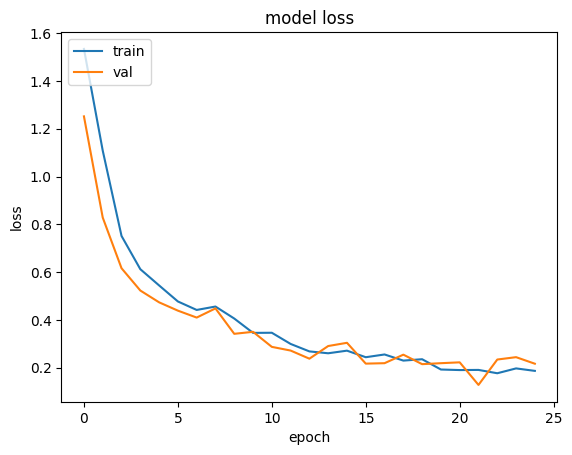

In [18]:
import matplotlib.pyplot as plt
plt.plot(dcase_model_history.history['loss'])
plt.plot(dcase_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

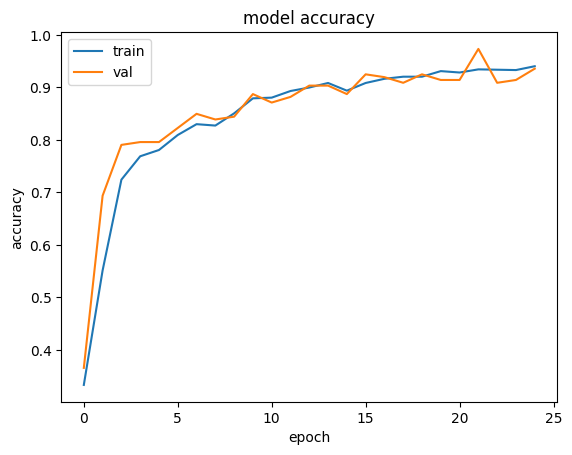

In [19]:
plt.plot(dcase_model_history.history['accuracy'])
plt.plot(dcase_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=32)

7/7 [==============================] - 0s 32ms/step - loss: 0.1706 - accuracy: 0.9275


In [21]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classed present in the training and validation datasets\n")
for key,value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classed present in the training and validation datasets

0 : Baby_Cry
1 : Door_Bell
2 : Door_Knock
3 : Fire_Alarm


In [22]:
from sklearn.metrics import classification_report
import numpy as np
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
print(classification_report(y_true, y_pred, target_names=labels.values()))

7/7 [==============================] - 0s 34ms/step
              precision    recall  f1-score   support

    Baby_Cry       0.97      0.97      0.97        62
   Door_Bell       0.75      0.90      0.82        30
  Door_Knock       1.00      1.00      1.00        49
  Fire_Alarm       0.93      0.83      0.88        52

    accuracy                           0.93       193
   macro avg       0.91      0.92      0.92       193
weighted avg       0.93      0.93      0.93       193

